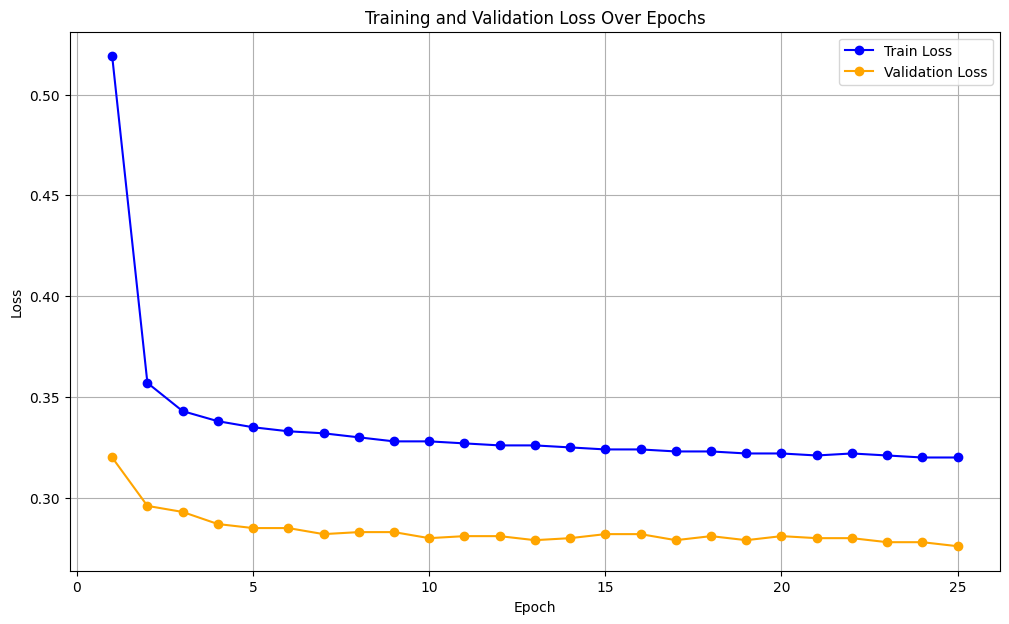

In [1]:
import re
import matplotlib.pyplot as plt

# Path to your log file
log_file_path = "/pfs/lustrep1/scratch/project_462000472/akhtar/climate_modeling/pangu-pm25/result/2025_01_14_test1/24/epoch_loss.log"

# Initialize lists for training and validation data
train_epochs = []
train_losses = []
validation_epochs = []
validation_losses = []

# Regular expressions to match training and validation loss lines
train_loss_pattern = re.compile(r"Epoch (\d+) : ([0-9.]+)$")
validation_loss_pattern = re.compile(r"Validate at Epoch (\d+) : ([0-9.]+)")

# Read and process the log file
with open(log_file_path, "r") as file:
    for line in file:
        # Match training loss
        if "Validate" not in line:
            train_match = train_loss_pattern.search(line)
            if train_match:
                epoch = int(train_match.group(1))
                loss = float(train_match.group(2))
                train_epochs.append(epoch)
                train_losses.append(loss)
        # Match validation loss
        if "Validate" in line:
            val_match = validation_loss_pattern.search(line)
            if val_match:
                epoch = int(val_match.group(1))
                loss = float(val_match.group(2))
                validation_epochs.append(epoch)
                validation_losses.append(loss)

# Plot the results
plt.figure(figsize=(12, 7))
plt.plot(train_epochs, train_losses, marker='o', label='Train Loss', color='blue')
plt.plot(validation_epochs, validation_losses, marker='o', label='Validation Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.grid(True)
plt.legend()
plt.show()